Base: Íris

In [ ]:
import jupyter
import sklearn
import scipy
import matplotlib
import numpy
import pandas as pd
import sys

print('sklearn: {}'.format(sklearn.__version__))
print('scipy: {}'.format(scipy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(numpy.__version__))
print('pandas : {}'.format(pd.__version__))
print('python : {}'.format(sys.version))

sklearn: 0.22.2.post1
scipy: 1.4.1
matplotlib: 3.2.2
numpy: 1.19.5
pandas : 1.1.5
python : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [ ]:
url = 'https://raw.githubusercontent.com/profmoisesomena/escience_and_tools/master/data/iris.csv'
names = ['sepal-length','sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url,header=0,names=names)

In [ ]:
print(dataset.shape)

(150, 5)


In [ ]:
print(dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


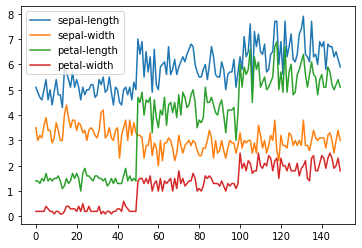

In [ ]:
dataset.plot()

Separando para testes


In [ ]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.25,random_state=0,shuffle=True) 

In [ ]:
X_train[:5]

array([[5.9, 3.0, 4.2, 1.5],
       [5.8, 2.6, 4.0, 1.2],
       [6.8, 3.0, 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]], dtype=object)

In [ ]:
Y_train[:5]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

Criando modelo

In [ ]:
model = LogisticRegression()


Treinando o modelo

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Fazendo predições

In [ ]:
model.predict([[6.8,3.0,5.5,2.1]])

array(['Iris-virginica'], dtype=object)

In [ ]:
model.predict([[4.7,3.2,1.3,0.2]])

array(['Iris-setosa'], dtype=object)

In [ ]:
model.predict([[6.9, 3.1, 5.1, 2.3]])

array(['Iris-virginica'], dtype=object)

Predições baseado em um conjunto de dados

... Usando o conjunto treinado como base e passando um conjunto de dados para prever 

In [ ]:
#Em todo conjunto de dados
predictions_train = model.predict(X_train)
predictions_validation = model.predict(X_validation)

In [ ]:
#Avaliando os resultados com os dados usados para treino
print(sklearn.metrics.accuracy_score(Y_train, predictions_train))

0.9821428571428571


In [ ]:
#Avaliando os resultados com os dados NÃO usados para treino
print(sklearn.metrics.accuracy_score(Y_validation, predictions_validation))


0.9736842105263158


Comparando o resultado predito com o valor original já esperado

In [ ]:
df = pd.DataFrame(data=numpy.c_[X_validation, Y_validation, predictions_validation], columns = ['sepal-length','sepal-width', 'petal-length', 'petal-width', 'classe-original', 'res-predito'])
df

,sepal-length,sepal-width,petal-length,petal-width,classe-original,res-predito
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6,2.2,4,1,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6,2.5,Iris-virginica,Iris-virginica
6,5,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4,1.3,Iris-versicolor,Iris-versicolor
